## <center> ID5002W:Industrial AI Laboratory
### <center> Week-8
### <center> Tree-based approaches for classification

**Contents:**  
1. Making different datasets
2. Decision tree classifier: Intrepretable model
3. Logistic regression vs Decision tree classifier
4. Decision tree classifier: High variance model
5. Bagging
6. Random forest classifier
7. Gradient boosting
8. Comparison of performance of tree based algorithms for mobile price prediction



In [1]:
# pip install -U scikit-learn

In [2]:
# importing necessary packages
import numpy as np # Linear algebra
import pandas as pd # Data import and manipulation
import matplotlib.pyplot as plt # Data visualization
from matplotlib.colors import ListedColormap # Data visualization

from sklearn.datasets import make_moons, make_circles, make_blobs # Datasets
from sklearn.model_selection import train_test_split # For model training and evaluation
from sklearn.model_selection import GridSearchCV # Hyper-parameter tuning

from sklearn.metrics import accuracy_score # Evaluation metric

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Tree visualization
from sklearn import tree
from sklearn.inspection import DecisionBoundaryDisplay

# Making different datasets

In [93]:
# loading datasets from sklearn
moonX,moonY = make_moons(n_samples=200, noise=0.3, random_state=0)
blobX,blobY = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=1, random_state=0)
circleX,circleY = make_circles(n_samples=200, noise=0.3, random_state=0,factor=0.1)

# splliting the dataset to training and testing dataset
moonX_train, moonX_test, moonY_train, moonY_test = train_test_split(moonX, moonY, test_size=0.2, random_state=0)
blobX_train, blobX_test, blobY_train, blobY_test = train_test_split(blobX, blobY, test_size=0.2, random_state=0)
circleX_train, circleX_test, circleY_train, circleY_test = train_test_split(circleX, circleY, test_size=0.2, random_state=0)

In [94]:
# utility function for plotting 2d actual data
def scatter_2d_data(x1,x2,y,ax,title):
  '''
  x1: feature 1
  x2: feature 2
  y: classes
  ax: matplotlib axis for plotting the data
  '''
  ax.scatter(x1,x2,c=y, cmap=ListedColormap(["#FF0000", "#0000FF"]))
  ax.set_title(title)

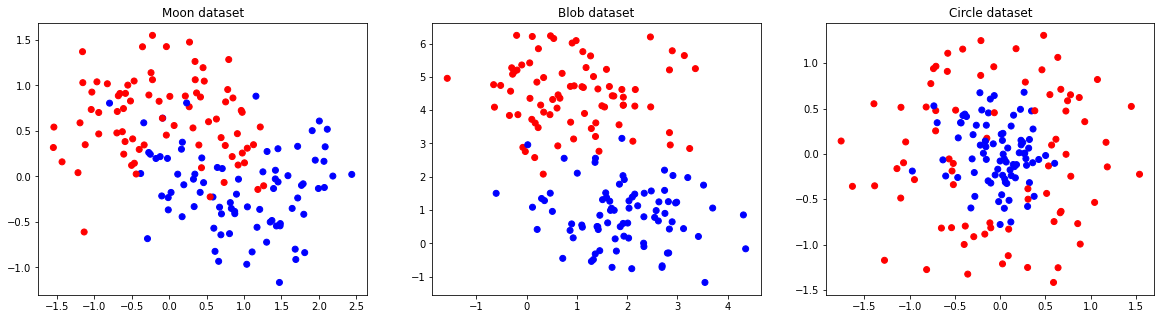

In [95]:
fig,ax =plt.subplots(1,3,figsize=(20,5))
ax=ax.flatten()
scatter_2d_data(moonX_train[:,0],moonX_train[:,1],moonY_train,ax[0],'Moon dataset')
scatter_2d_data(blobX_train[:,0],blobX_train[:,1],blobY_train,ax[1],'Blob dataset')
scatter_2d_data(circleX_train[:,0],circleX_train[:,1],circleY_train,ax[2],'Circle dataset')

# Decision tree: Intrepretable model

In [6]:
# utility function to plot the progress of decision tree training
def plot_DT_progress(x,y,n_steps):
  '''
  x: features
  y: class
  n_steps: number of steps for which progress has to be plotted
  '''
  fig,ax = plt.subplots(n_steps,2,figsize=(5*n_steps,5*n_steps))
  ax=ax.flatten()
  for i in range(n_steps):
    model = DecisionTreeClassifier(max_depth=i+1).fit(x,y)
    tree.plot_tree(model,ax=ax[i*2])
    ax[(i*2)+1].scatter(x[:,0],x[:,1],c=y, cmap=ListedColormap(["#FF0000", "#0000FF"]))
    db = DecisionBoundaryDisplay.from_estimator(model,x,xlabel='x1',ylabel='x2',alpha=0.5,ax=ax[(i*2)+1],response_method="predict")

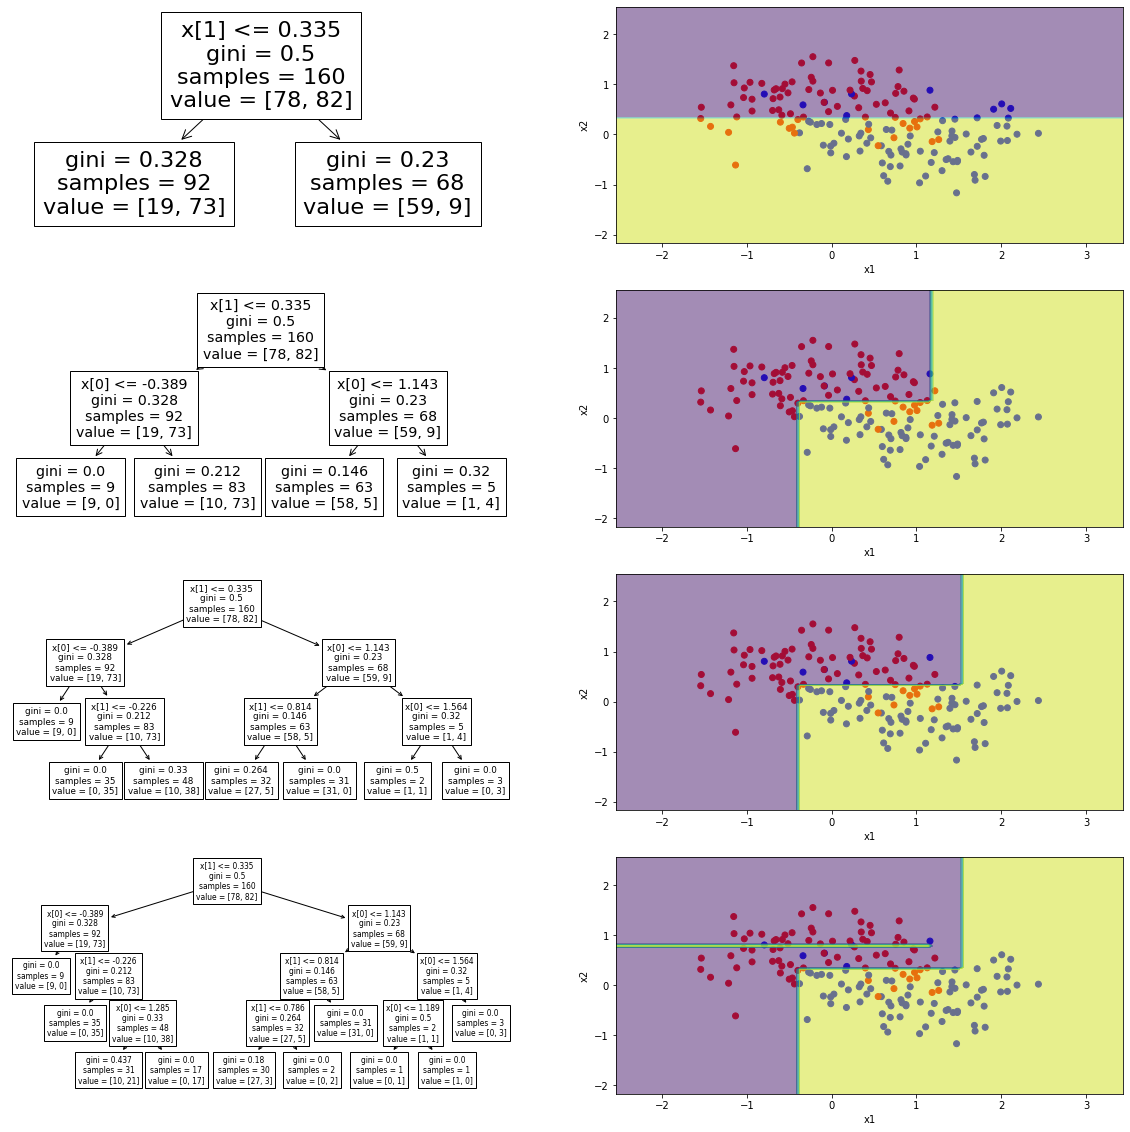

In [7]:
plot_DT_progress(moonX_train,moonY_train,4)

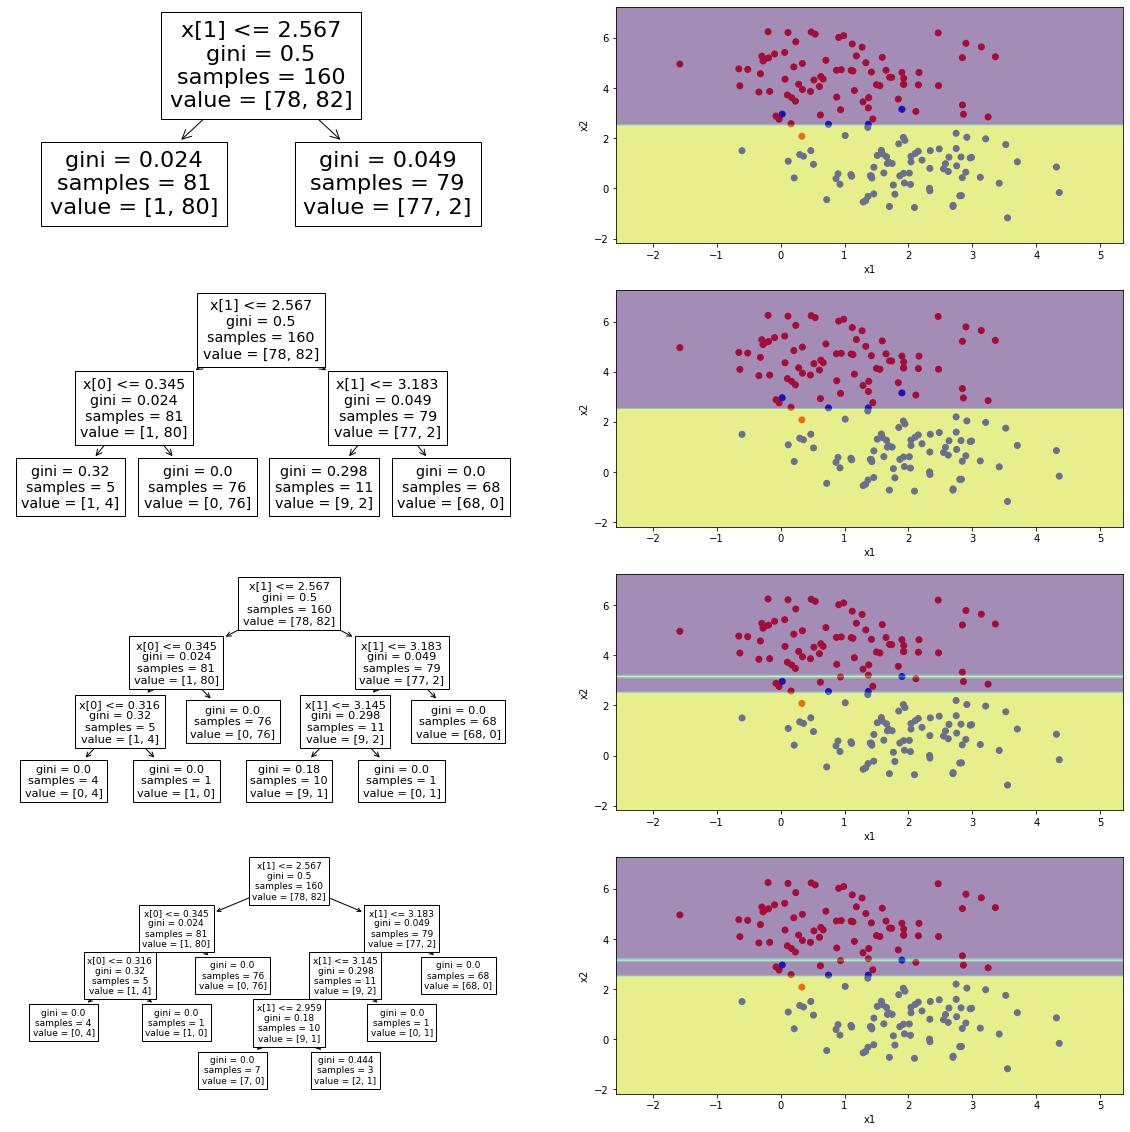

In [8]:
plot_DT_progress(blobX_train,blobY_train,4)

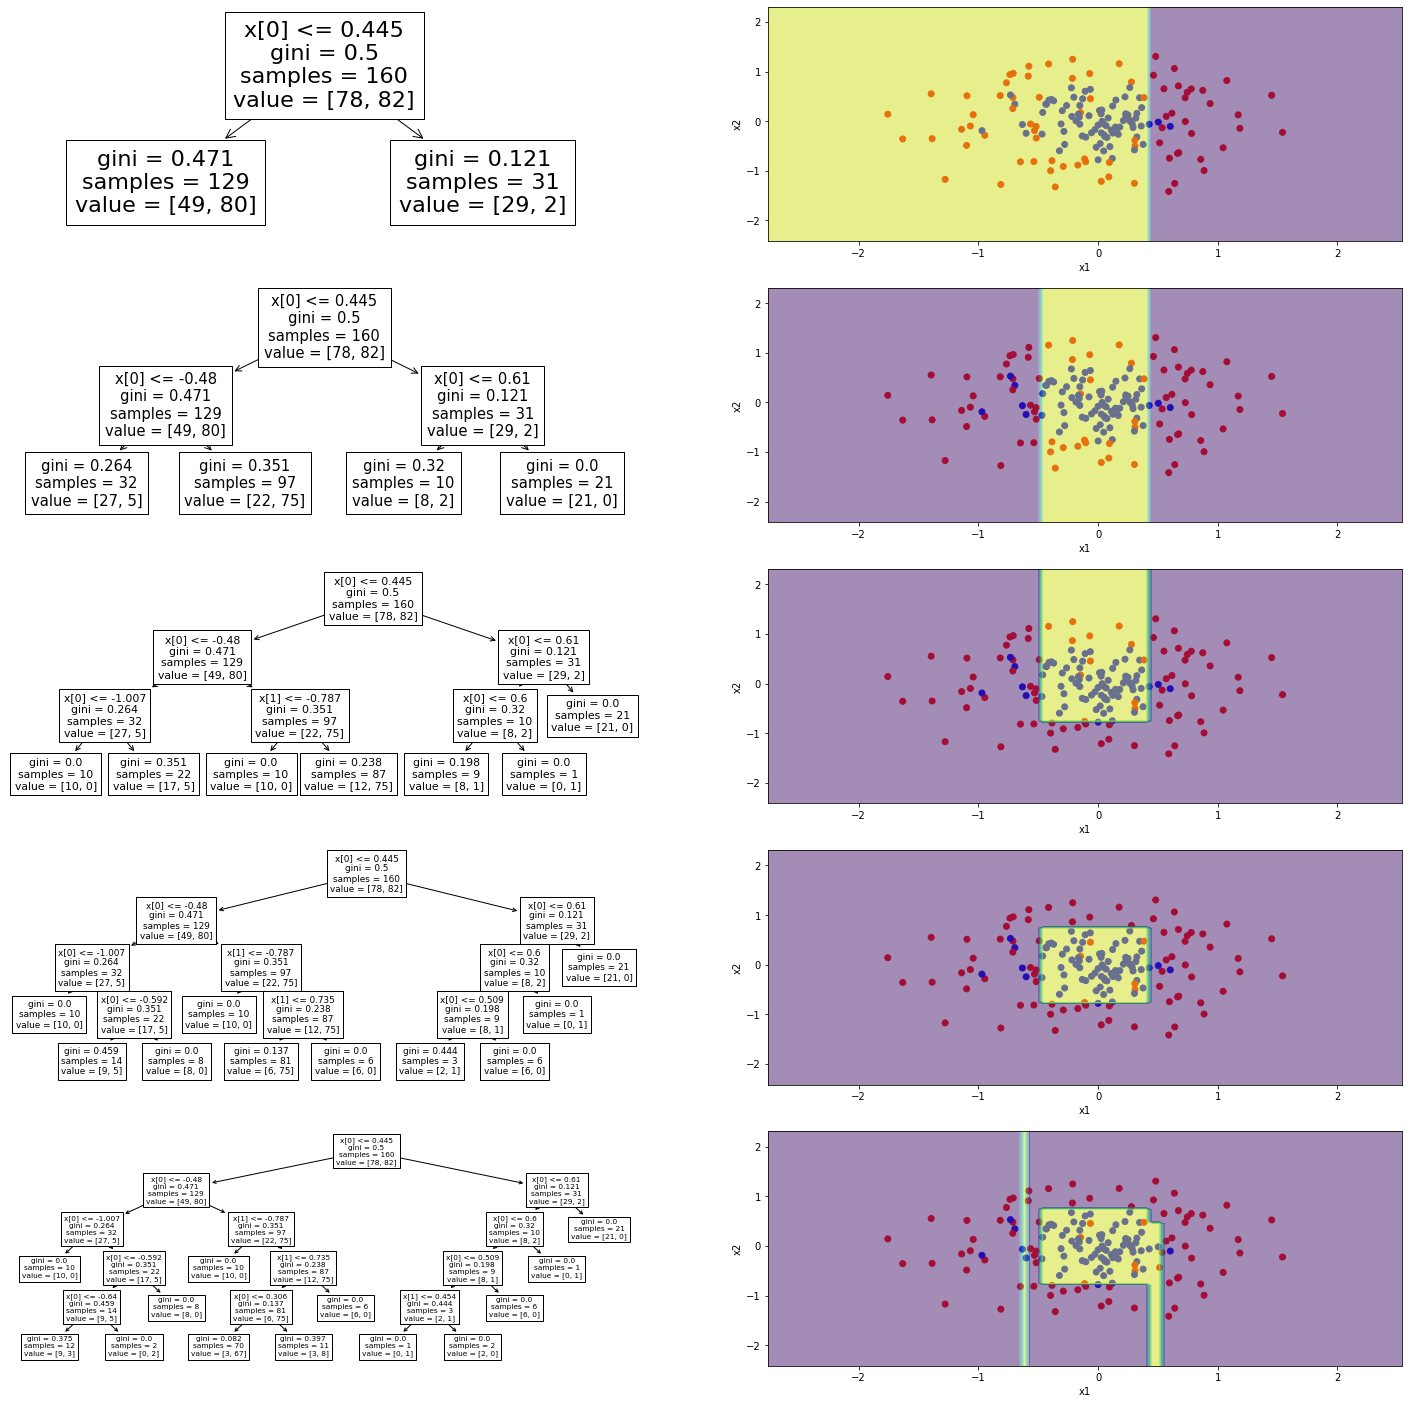

In [9]:
plot_DT_progress(circleX_train,circleY_train,5)

# Logistic regression vs Decision tree classifier

In [10]:
# plot the decision boundary of the model in 2d data
def plot_decision_boundary(x,y,model,ax):
  '''
  x: features
  y: class
  model: the trained model for which the decision boundary has to be plotted
  ax: matplotlib axis
  title: title of the plot
  '''
  ax.scatter(x[:,0],x[:,1],c=y, cmap=ListedColormap(["#FF0000", "#0000FF"]))
  db = DecisionBoundaryDisplay.from_estimator(model,x,xlabel='x1',ylabel='x2',alpha=0.5,ax=ax,response_method="predict")

In [11]:
# Training the logistic regression model and decision tree model on different datasets
LGmodel1 = LogisticRegression().fit(blobX_train,blobY_train)
LGmodel2 = LogisticRegression().fit(circleX_train,circleY_train)
LGmodel3 = LogisticRegression().fit(moonX_train,moonY_train)

DTmodel1 = DecisionTreeClassifier().fit(blobX_train,blobY_train)
DTmodel2 = DecisionTreeClassifier().fit(circleX_train,circleY_train)
DTmodel3 = DecisionTreeClassifier().fit(moonX_train,moonY_train)

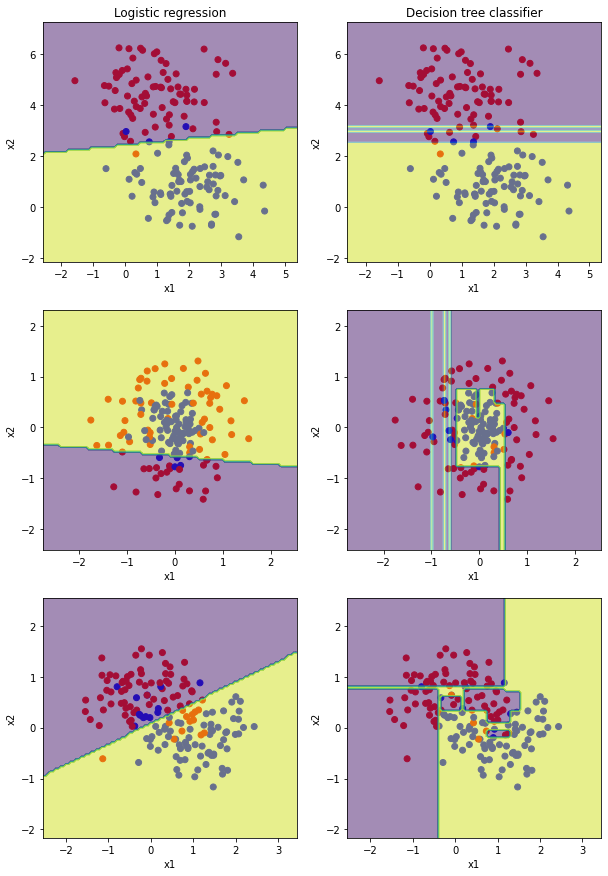

In [12]:
fig,ax = plt.subplots(3,2,figsize=(10,15))
ax=ax.flatten()
plot_decision_boundary(blobX_train,blobY_train,LGmodel1,ax[0])
plot_decision_boundary(blobX_train,blobY_train,DTmodel1,ax[1])
plot_decision_boundary(circleX_train,circleY_train,LGmodel2,ax[2])
plot_decision_boundary(circleX_train,circleY_train,DTmodel2,ax[3])
plot_decision_boundary(moonX_train,moonY_train,LGmodel3,ax[4])
plot_decision_boundary(moonX_train,moonY_train,DTmodel3,ax[5])
ax[0].set_title('Logistic regression')
ax[1].set_title('Decision tree classifier');

![DT_arch.jpeg](https://drive.google.com/uc?export=view&id=1UVJScDlYZhzX0suxof6sLMv4PM6KUOuY)

![stop_cri.jpeg](https://drive.google.com/uc?export=view&id=1kSPzo2XchoONeqAMXlypozrzvLT4JS88)


# Decision Trees: A high variance model


In [13]:
# cross validation to get the optimal hyperparameters
Dtree = DecisionTreeClassifier()
param_choice = {
    "max_leaf_nodes": np.linspace(10,50,30).astype(int),
    "max_depth": list(range(3,9))
}
gr_search_cv = GridSearchCV(Dtree, param_choice,n_jobs=-1, cv=5)

In [14]:
# blob dataset
gr_search_cv.fit(blobX_train, blobY_train)
print(gr_search_cv.best_estimator_)
hypertuned_tree_blob = gr_search_cv.best_estimator_

# normal tree
N_tree_blob = DecisionTreeClassifier().fit(blobX_train,blobY_train)
# hypertuned tree vs normal tree
print('In train dataset:')
print('Hypertuned tree score:',accuracy_score(hypertuned_tree_blob.predict(blobX_train),blobY_train))
print('Normal tree score:',accuracy_score(N_tree_blob.predict(blobX_train),blobY_train))

print('In test dataset:')
print('Hypertuned tree score:',accuracy_score(hypertuned_tree_blob.predict(blobX_test),blobY_test))
print('Normal tree score:',accuracy_score(N_tree_blob.predict(blobX_test),blobY_test))

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10)
In train dataset:
Hypertuned tree score: 0.99375
Normal tree score: 1.0
In test dataset:
Hypertuned tree score: 0.975
Normal tree score: 0.975


In [15]:
# circle dataset
gr_search_cv.fit(circleX_train, circleY_train)
print(gr_search_cv.best_estimator_)
hypertuned_tree_circle = gr_search_cv.best_estimator_

# normal tree
N_tree_circle = DecisionTreeClassifier().fit(circleX_train,circleY_train)
# hypertuned tree vs normal tree
print('In train dataset:')
print('Hypertuned tree score:',accuracy_score(hypertuned_tree_circle.predict(circleX_train),circleY_train))
print('Normal tree score:',accuracy_score(N_tree_circle.predict(circleX_train),circleY_train))

print('In test dataset:')
print('Hypertuned tree score:',accuracy_score(hypertuned_tree_circle.predict(circleX_test),circleY_test))
print('Normal tree score:',accuracy_score(N_tree_circle.predict(circleX_test),circleY_test))

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10)
In train dataset:
Hypertuned tree score: 0.93125
Normal tree score: 1.0
In test dataset:
Hypertuned tree score: 0.85
Normal tree score: 0.875


In [16]:
# moon dataset
gr_search_cv.fit(moonX_train, moonY_train)
print(gr_search_cv.best_estimator_)
hypertuned_tree_moon = gr_search_cv.best_estimator_

# normal tree
N_tree_moon = DecisionTreeClassifier().fit(moonX_train,moonY_train)
# hypertuned tree vs normal tree
print('In train dataset:')
print('Hypertuned tree score:',accuracy_score(hypertuned_tree_moon.predict(moonX_train),moonY_train))
print('Normal tree score:',accuracy_score(N_tree_moon.predict(moonX_train),moonY_train))

print('In test dataset:')
print('Hypertuned tree score:',accuracy_score(hypertuned_tree_moon.predict(moonX_test),moonY_test))
print('Normal tree score:',accuracy_score(N_tree_moon.predict(moonX_test),moonY_test))

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=11)
In train dataset:
Hypertuned tree score: 0.95625
Normal tree score: 1.0
In test dataset:
Hypertuned tree score: 0.9
Normal tree score: 0.85


# Bagging classifier

![bag.jpeg](https://drive.google.com/uc?export=view&id=1jeCcMvWNAKkoxQ2VQh1dVk9rOnS3XQC9)


In [17]:
# plot the decision boundary of the model in 2d data
def plot_decision_boundary_ensemble(x,y,model,ax):
  '''
  x: features
  y: class
  model: the trained model for which the decision boundary has to be plotted
  ax: matplotlib axis
  title: title of the plot
  '''
  for i in model.estimators_:
    db = DecisionBoundaryDisplay.from_estimator(i,x,alpha=0.05,ax=ax,response_method="predict")
  ax.scatter(x[:,0],x[:,1],c=y, cmap=ListedColormap(["#FF0000", "#0000FF"]),alpha=0.7)

In [18]:
# Blob dataset and use 100 estimators
n_estimators = 100
basemodel=DecisionTreeClassifier()
m=BaggingClassifier(estimator=basemodel, n_estimators=n_estimators)
param_choice = {"estimator__max_depth": list(range(3,9))}
gr_search_cv = GridSearchCV(m, param_choice,n_jobs=-1, cv=5) # hyper-parameter tuning
gr_search_cv.fit(blobX_train,blobY_train)
bagging_blob = gr_search_cv.best_estimator_

In [19]:
# Circle dataset and use 100 estimators
n_estimators = 100
basemodel=DecisionTreeClassifier()
m=BaggingClassifier(estimator=basemodel, n_estimators=n_estimators)
param_choice = {"estimator__max_depth": list(range(3,9))}
gr_search_cv = GridSearchCV(m, param_choice,n_jobs=-1, cv=5) # hyper-parameter tuning
gr_search_cv.fit(circleX_train,circleY_train)
bagging_circle = gr_search_cv.best_estimator_

In [20]:
# Moon dataset and use 100 estimators
n_estimators = 100
basemodel=DecisionTreeClassifier()
m=BaggingClassifier(estimator=basemodel, n_estimators=n_estimators)
param_choice = {"estimator__max_depth": list(range(3,9))}
gr_search_cv = GridSearchCV(m, param_choice,n_jobs=-1, cv=5) # hyper-parameter tuning
gr_search_cv.fit(moonX_train,moonY_train)
bagging_moon = gr_search_cv.best_estimator_

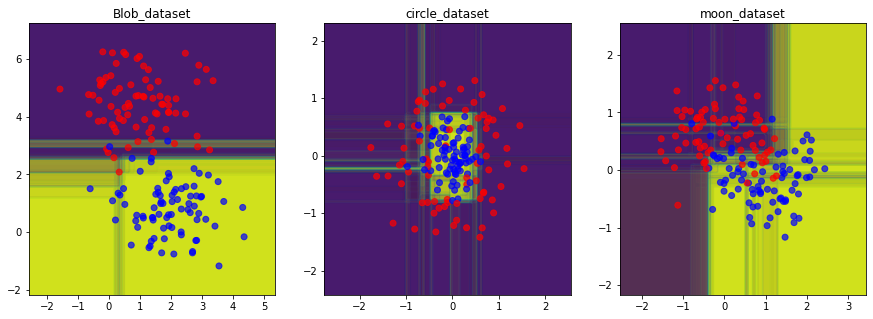

In [21]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
plot_decision_boundary_ensemble(blobX_train, blobY_train,bagging_blob,ax[0])
ax[0].set_title('Blob_dataset')

plot_decision_boundary_ensemble(circleX_train, circleY_train,bagging_circle,ax[1])
ax[1].set_title('circle_dataset')

plot_decision_boundary_ensemble(moonX_train, moonY_train,bagging_moon,ax[2])
ax[2].set_title('moon_dataset');

# Random forest classifier


![rf.jpeg](https://drive.google.com/uc?export=view&id=1bshha2H4X8a3hIusPbrtebTg8LUH7Ypw)


In [22]:
# Blob dataset and use 100 estimators
n_estimators = 100
m=RandomForestClassifier(n_estimators=n_estimators)
param_choice = {"max_depth": list(range(3,9))}
gr_search_cv = GridSearchCV(m, param_choice,n_jobs=-1, cv=5) # hyper-parameter tuning
gr_search_cv.fit(blobX_train,blobY_train)
rf_blob = gr_search_cv.best_estimator_

In [23]:
# Circle dataset and use 100 estimators
n_estimators = 100
m=RandomForestClassifier(n_estimators=n_estimators)
param_choice = {"max_depth": list(range(3,9))}
gr_search_cv = GridSearchCV(m, param_choice,n_jobs=-1, cv=5) # hyper-parameter tuning
gr_search_cv.fit(circleX_train,circleY_train)
rf_circle = gr_search_cv.best_estimator_

In [24]:
# Moon dataset and use 100 estimators
n_estimators = 100
m=RandomForestClassifier(n_estimators=n_estimators)
param_choice = {"max_depth": list(range(3,9))}
gr_search_cv = GridSearchCV(m, param_choice,n_jobs=-1, cv=5) # hyper-parameter tuning
gr_search_cv.fit(moonX_train,moonY_train)
rf_moon = gr_search_cv.best_estimator_

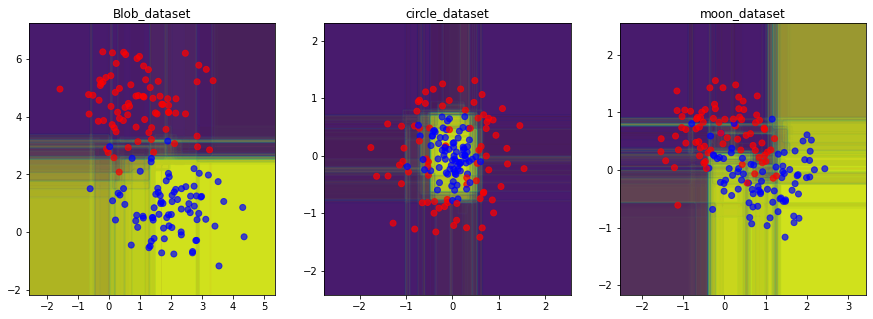

In [25]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
plot_decision_boundary_ensemble(blobX_train, blobY_train,rf_blob,ax[0])
ax[0].set_title('Blob_dataset')

plot_decision_boundary_ensemble(circleX_train, circleY_train,rf_circle,ax[1])
ax[1].set_title('circle_dataset')

plot_decision_boundary_ensemble(moonX_train, moonY_train,rf_moon,ax[2])
ax[2].set_title('moon_dataset');

# Gradient boosting classifier

In [26]:
# Blob dataset and use 100 estimators
n_estimators = 100
m=GradientBoostingClassifier(n_estimators=n_estimators,max_depth=1)
param_choice = {"learning_rate": np.linspace(0.01,0.5,10)}
gr_search_cv = GridSearchCV(m, param_choice,n_jobs=-1, cv=5) # hyper-parameter tuning
gr_search_cv.fit(blobX_train,blobY_train)
gb_blob = gr_search_cv.best_estimator_

In [27]:
# Circle dataset and use 100 estimators
n_estimators = 100
m=GradientBoostingClassifier(n_estimators=n_estimators,max_depth=1)
param_choice = {"learning_rate": np.linspace(0.01,0.5,10)}
gr_search_cv = GridSearchCV(m, param_choice,n_jobs=-1, cv=5) # hyper-parameter tuning
gr_search_cv.fit(circleX_train,circleY_train)
gb_circle = gr_search_cv.best_estimator_

In [28]:
# Moon dataset and use 100 estimators
n_estimators = 100
m=GradientBoostingClassifier(n_estimators=n_estimators,max_depth=1)
param_choice = {"learning_rate": np.linspace(0.01,0.5,10)}
gr_search_cv = GridSearchCV(m, param_choice,n_jobs=-1, cv=5) # hyper-parameter tuning
gr_search_cv.fit(moonX_train,moonY_train)
gb_moon = gr_search_cv.best_estimator_

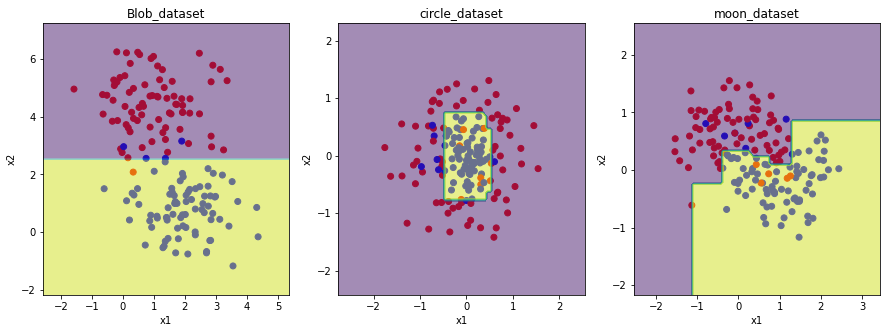

In [29]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
plot_decision_boundary(blobX_train, blobY_train,gb_blob,ax[0])
ax[0].set_title('Blob_dataset')

plot_decision_boundary(circleX_train, circleY_train,gb_circle,ax[1])
ax[1].set_title('circle_dataset')

plot_decision_boundary(moonX_train, moonY_train,gb_moon,ax[2])
ax[2].set_title('moon_dataset');

# Comparing model's performance

In [30]:
# utility function to plot the accuracies of the models
def plot_acc(acc_train,acc_test,models):
  '''
  acc_train: Training accuracies in the order of models
  acc_test:  Testing accuracies in the order of models
  models: Names of the models used
  '''
  n_bars = len(acc_train)
  x_1 = np.arange(1,(n_bars)*2,2)
  x_2 = np.arange(1,(n_bars)*2,2)+0.6
  plt.bar(x_1,acc_train,color='b',label='Train',width=0.6)
  plt.bar(x_2,acc_test,color='r',label='Test',width=0.6)
  plt.xticks(ticks=x_1+0.3,labels=models)
  plt.xlabel('Models')
  plt.ylabel('Accuracies')
  plt.legend();

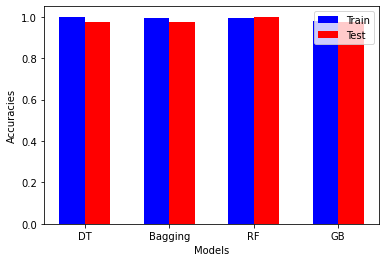

In [31]:
# blob dataset
data = [blobX_test,blobY_test,blobX_train,blobY_train]
models = [N_tree_blob,bagging_blob,rf_blob,gb_blob]
model_names=['DT','Bagging','RF','GB']
train_acc,test_acc=[],[]
for m in models:
  acc = accuracy_score(data[1],m.predict(data[0]))
  test_acc.append(acc)
  acc = accuracy_score(data[3],m.predict(data[2]))
  train_acc.append(acc)
plot_acc(train_acc,test_acc,model_names);

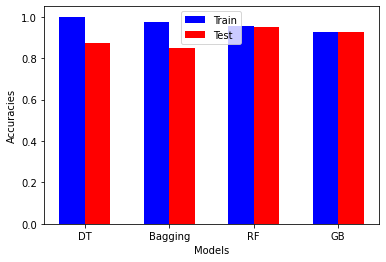

In [32]:
# circle dataset
data = [circleX_test,circleY_test,circleX_train,circleY_train]
models = [N_tree_circle,bagging_circle,rf_circle,gb_circle]
model_names=['DT','Bagging','RF','GB']
train_acc,test_acc=[],[]
for m in models:
  acc = accuracy_score(data[1],m.predict(data[0]))
  test_acc.append(acc)
  acc = accuracy_score(data[3],m.predict(data[2]))
  train_acc.append(acc)
plot_acc(train_acc,test_acc,model_names);

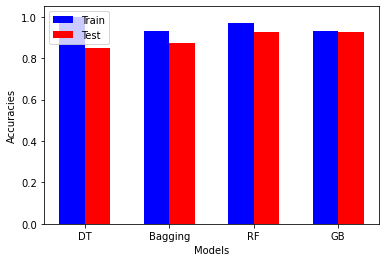

In [33]:
# moon dataset
data = [moonX_test,moonY_test,moonX_train,moonY_train]
models = [N_tree_moon,bagging_moon,rf_moon,gb_moon]
model_names=['DT','Bagging','RF','GB']
train_acc,test_acc=[],[]
for m in models:
  acc = accuracy_score(data[1],m.predict(data[0]))
  test_acc.append(acc)
  acc = accuracy_score(data[3],m.predict(data[2]))
  train_acc.append(acc)
plot_acc(train_acc,test_acc,model_names);

# Comparison of performance of tree based algorithms for mobile price prediction

data source: https://www.kaggle.com/code/vikramb/mobile-price-prediction

In [34]:
mobile_df = pd.read_csv('Mobile_price_prediction.csv')
mobile_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [35]:
# checking for nan values
print(mobile_df.isna().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [43]:
X = mobile_df.drop(['price_range'],axis=1)
Y = mobile_df['price_range']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [63]:
# Decision tree classifier
m=DecisionTreeClassifier()
param_choice = {"max_depth": list(range(6,12))}
gr_search_cv = GridSearchCV(m, param_choice,n_jobs=-1, cv=5) # hyper-parameter tuning
gr_search_cv.fit(X_train,Y_train)
DT_mobile = gr_search_cv.best_estimator_

In [64]:
# Bagging classifier
n_estimators = 100
basemodel=DecisionTreeClassifier()
m=BaggingClassifier(estimator=basemodel, n_estimators=n_estimators)
param_choice = {"estimator__max_depth": list(range(6,12))}
gr_search_cv = GridSearchCV(m, param_choice,n_jobs=-1, cv=5) # hyper-parameter tuning
gr_search_cv.fit(X_train,Y_train)
bagging_mobile = gr_search_cv.best_estimator_

In [65]:
# Random forest classifier
n_estimators = 100
m=RandomForestClassifier(n_estimators=n_estimators)
param_choice = {"max_depth": list(range(6,12))}
gr_search_cv = GridSearchCV(m, param_choice,n_jobs=-1, cv=5) # hyper-parameter tuning
gr_search_cv.fit(X_train,Y_train)
rf_mobile = gr_search_cv.best_estimator_

In [66]:
# Gradient descent classifier
n_estimators = 100
m=GradientBoostingClassifier(n_estimators=n_estimators,max_depth=1)
param_choice = {"learning_rate": np.linspace(0.01,0.8,15)}
gr_search_cv = GridSearchCV(m, param_choice,n_jobs=-1, cv=5) # hyper-parameter tuning
gr_search_cv.fit(X_train,Y_train)
gb_mobile = gr_search_cv.best_estimator_

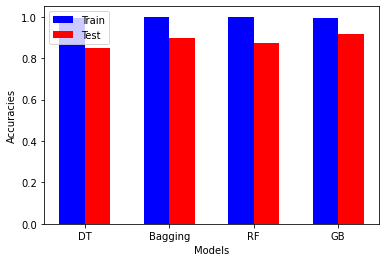

In [67]:
# Model performance comparison
data = [X_test,Y_test,X_train,Y_train]
models = [DT_mobile,bagging_mobile,rf_mobile,gb_mobile]
model_names=['DT','Bagging','RF','GB']
train_acc,test_acc=[],[]
for m in models:
  acc = accuracy_score(data[1],m.predict(data[0]))
  test_acc.append(acc)
  acc = accuracy_score(data[3],m.predict(data[2]))
  train_acc.append(acc)
plot_acc(train_acc,test_acc,model_names);

In [86]:
def plot_feature_importances(df,model):
    '''
    df: dataframe of the features/independent variables
    model: Trained tree model
    '''
    n_features = df.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

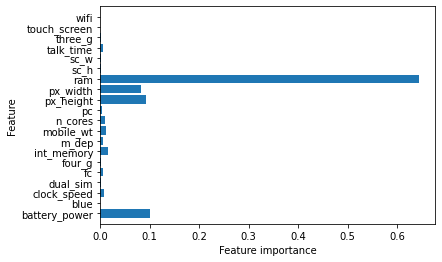

In [87]:
# Decision tree classifier
plot_feature_importances(X_train,DT_mobile)

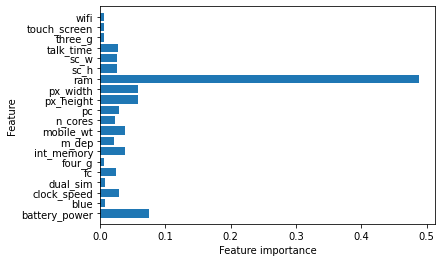

In [88]:
# Random forest classifier
plot_feature_importances(X_train,rf_mobile)

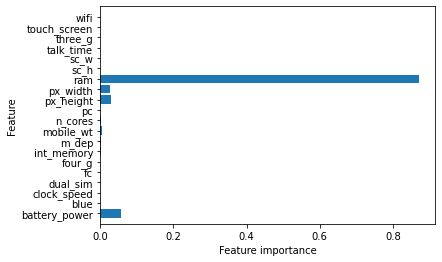

In [89]:
# Gradient boositng classifier
plot_feature_importances(X_train,gb_mobile)